In [2]:
!pip install bing-image-downloader


1.Setting up-dependencies

In [13]:
!pip install tensorflow opencv-python matplotlib

In [16]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

2.Loading the required data
* Local data 
* data scrapped from the web using python package bing-image-downloader

In [7]:
from bing_image_downloader import downloader
downloader.download("pan card india", limit=100,  output_dir='pii-dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /kaggle/working/pii-dataset/pan card india


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://datastore01.rediff.com/h1500-w1500/thumb/5B621E6453615E566F676A5A645C6C5E7268/bdbnfwnvawo4cofj.D.0.PAN-CARD.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://3.bp.blogspot.com/-iIHtXgQ5gRc/WHpbLAXLbpI/AAAAAAAAei0/3sKmF0ceAs0ibdudDzqguskCXohkXNEDgCLcB/s1600/pan-card-india-759.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://realtyquarter.com/wp-content/uploads/2019/05/PAN-CARD.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://stockmarket360.in/wp-content/uploads/2013/05/PAN_Card_Sample-01.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://5.imimg.com/data5/WX/LM/MY-53146131/pancard-500x500.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://5.imimg.com/data5/YN/BJ/MY-21531577/pan-card-500x500.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https

In [9]:
downloader.download("pictures", limit=100,  output_dir='pii-dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /kaggle/working/pii-dataset/pictures


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://thewowstyle.com/wp-content/uploads/2015/01/nature-images.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://thewowstyle.com/wp-content/uploads/2015/07/natural-landscape-purple-lake-wallpaper-.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://thewowstyle.com/wp-content/uploads/2015/01/nature-images..jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://thewowstyle.com/wp-content/uploads/2015/01/free-beautiful-place-wallpaper-hd-173.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://thewowstyle.com/wp-content/uploads/2015/02/now-i-am-free.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://wallup.net/wp-content/uploads/2016/01/258626-nature-landscape-lake-reflection-mountain-clouds-forest-Italy-water-summer-trees-calm.jpg
[%] File Downloaded !

[%] Downloading Image #7 

3.Buliding data pipeline

Found 204 files belonging to 2 classes.


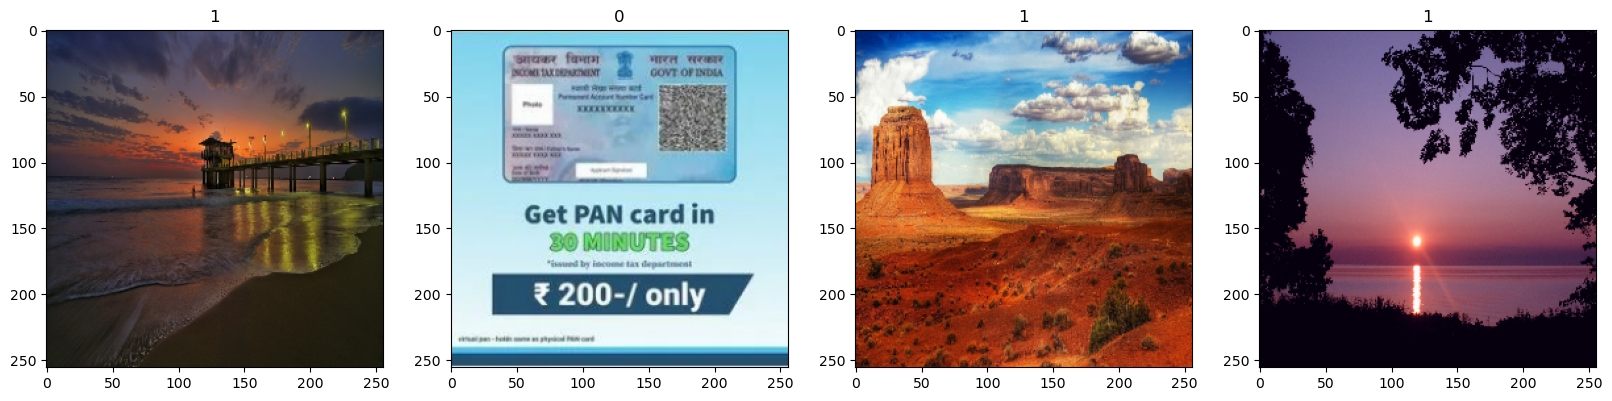

In [18]:
data = tf.keras.utils.image_dataset_from_directory('pii-dataset')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
batch[1]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

3.Scale data

In [25]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [5.64644597e-02, 2.45925248e-01, 4.38082099e-01],
          [6.70343116e-02, 2.47426465e-01, 4.39583331e-01],
          [6.65134788e-02, 2.71415442e-01, 4.92003679e-01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [5.13786748e-02, 2.39613965e-01, 4.28308815e-01],
          [6.58088252e-02, 2.54044116e-01, 4.46200967e-01],
          [6.86274543e-02, 2.81372547e-01, 5.04901946e-01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [6.96078464e-02, 2.50000000e-01, 4.4215

4.Split data-
* Train 
* Validation 
* Test 

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

5.The ML Model-DL model:detect PII documents.

In [27]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [29]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

6.Training the model

In [31]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 15s 3s/step - loss: 0.8246 - accuracy: 0.5391 - val_loss: 0.5740 - val_accuracy: 0.7188
Epoch 2/20
4/4 [==============================] - 13s 3s/step - loss: 0.6143 - accuracy: 0.6016 - val_loss: 0.5589 - val_accuracy: 0.7812
Epoch 3/20
4/4 [==============================] - 11s 2s/step - loss: 0.4577 - accuracy: 0.8906 - val_loss: 0.3186 - val_accuracy: 0.9375
Epoch 4/20
4/4 [==============================] - 11s 2s/step - loss: 0.2891 - accuracy: 0.8984 - val_loss: 0.2334 - val_accuracy: 0.9062
Epoch 5/20
4/4 [==============================] - 13s 3s/step - loss: 0.2366 - accuracy: 0.9297 - val_loss: 0.1895 - val_accuracy: 0.9688
Epoch 6/20
4/4 [==============================] - 13s 3s/step - loss: 0.1955 - accuracy: 0.9219 - val_loss: 0.3327 - val_accuracy: 0.9062
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.2852 - accuracy: 0.8828 - val_loss: 0.1885 - val_accuracy: 0.9062
Epoch 8/20
4/4 [==================

7.Performance

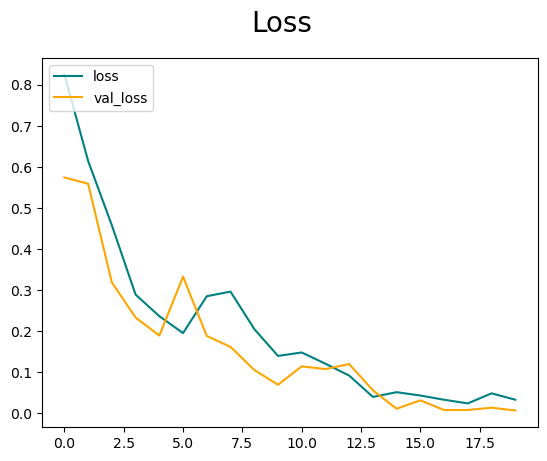

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


8.Evaluation

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


9.Test run

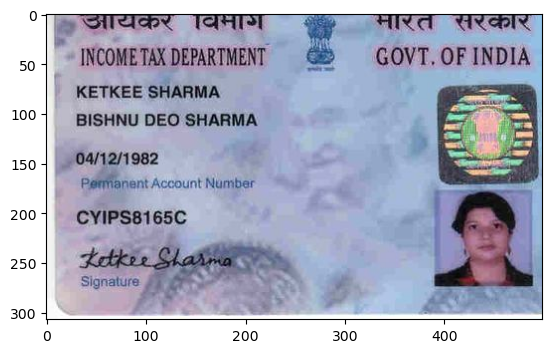

In [47]:
import cv2
img = cv2.imread('test.jpg')#the path or the file to test the model
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

additional-resizing to fit in pictures not captured well

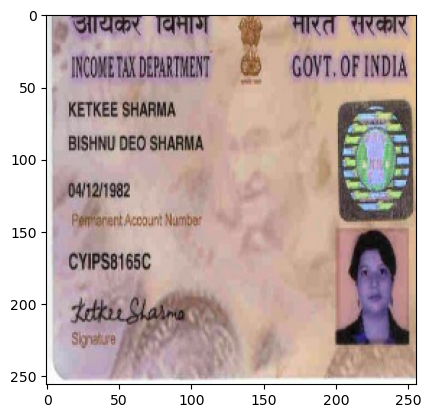

In [50]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 162ms/step


array([[0.25872418]], dtype=float32)

In [52]:
if yhat > 0.5: 
    print('Predicted class is non pii')
else:
    print(f'Predicted class is pii')

Predicted class is pii
